# Python Notebook: construction of sea level rise impact analysis graphs 

Context:

The purpose of the python program is to build different graphs from an input allowing to measure the impacted schools as well as the populations according to gender / age group by the level of the sea.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from osgeo import gdal
# import joypy

from os.path import join

INPUT_FOLDER = join("D:/Donnees", "Others", "geographic", "bangladesh")

# Construction of the number of schools impacted by sea level per year 

### Dataframe input definition 

 - In the imported dataframe we find the following variables: 
 - Year: The observated year
 - nb_school : The number of schools under the sea level
 - pop_age_school: The number of persons in the group who were impacted by the sea level

In [2]:
# Data Import

dataframe_sea_impact = (
    pd
    .read_csv(join(INPUT_FOLDER, "school_flood_by_year.csv"), sep = ',', header=0)
    .groupby(by="year")
    .agg({"school": "count"})
    .rename(columns={"school": "nb_school"})
    .reset_index()
)
dataframe_sea_impact.head()

,year,nb_school
0,2020,265
1,2023,1
2,2024,33
3,2025,3
4,2026,3


19


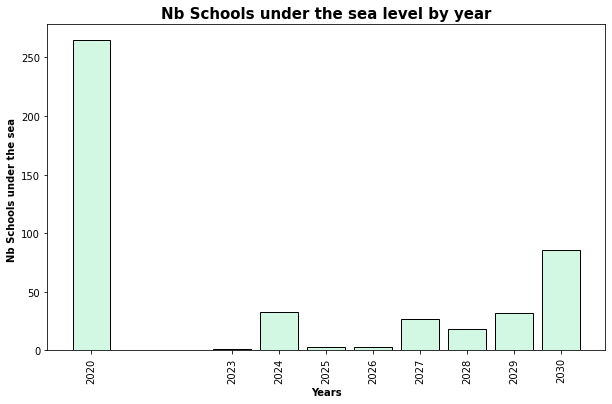

In [3]:
# Representation of the evolution of the number of school under the sea level by year

#########
##### Axis definition: x are years and y the number of schools under the sea

x = dataframe_sea_impact['year'] 
y = dataframe_sea_impact['nb_school']
n_bins = 19

###
# Creating histogram

plt.figure(figsize=(10, 6))

###
#Bar Construction
plt.bar(x,y,align='center' , 
        facecolor='#D2F8E4' , 
        edgecolor = 'black' ) # A bar chart

###
# X custom Axis
plt.xlabel('Years' ,
           fontweight='bold')
plt.xticks(x, rotation = 90)


# Y custom Axis
plt.ylabel('Nb Schools under the sea ', 
           fontweight='bold',
          )

# Title custom
plt.title('Nb Schools under the sea level by year', 
          fontweight='bold', size = 15)

###
# Show plot
plt.show()

# Construction of the population impacted by sea level per year

Now we compute visualizations for the populations impacted by the rise of sea levels.

In [4]:
dataframe_sea_impact = (
    pd
    .read_csv("data/dummy.csv", sep=";", header=0)
)
dataframe_sea_impact.info()
dataframe_sea_impact.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   year             19 non-null     int64
 1   nb_school        19 non-null     int64
 2   pop_age_school1  19 non-null     int64
 3   pop_age_school2  19 non-null     int64
 4   pop_age_school3  19 non-null     int64
dtypes: int64(5)
memory usage: 888.0 bytes


,year,nb_school,pop_age_school1,pop_age_school2,pop_age_school3
0,2000,300,0,3000,0
1,2001,493,50,600,500
2,2002,36,100,200,30
3,2003,787,200,400,30
4,2004,64,0,10,30


Index(['pop_age_school1', 'pop_age_school2', 'pop_age_school3'], dtype='object')


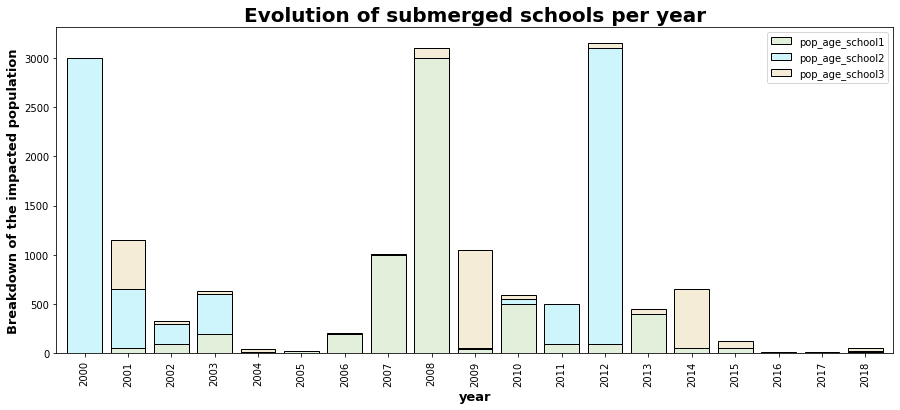

In [5]:
# Change size

# Initialization
fig, ax = plt.subplots(figsize=(15,6))


# Population List from the input file : We take all the variables after the number of school
colz = dataframe_sea_impact.loc[:,~dataframe_sea_impact.columns.isin(['year', 'nb_school'])].columns
print(colz)


# plot data in stack manner of bar type
dataframe_sea_impact.plot(
    x='year', 
    y=colz,
    color = ["#E2EFDA","#CEF5FC",'#F4ECD6'],
    kind='bar',
    stacked=True,
    ax=ax,
    edgecolor = 'black',
    width = 0.8
)


ax.set_title('Evolution of submerged schools per year', 
             fontsize=20 , 
             fontweight='bold')

ax.set_xlabel('year', 
              fontweight='bold', 
              size = 13)
ax.set_ylabel('Breakdown of the impacted population', 
              fontweight='bold' , 
              size = 13)
plt.show(fig)

# Conctruction of the population & school impacted by sea level per year  

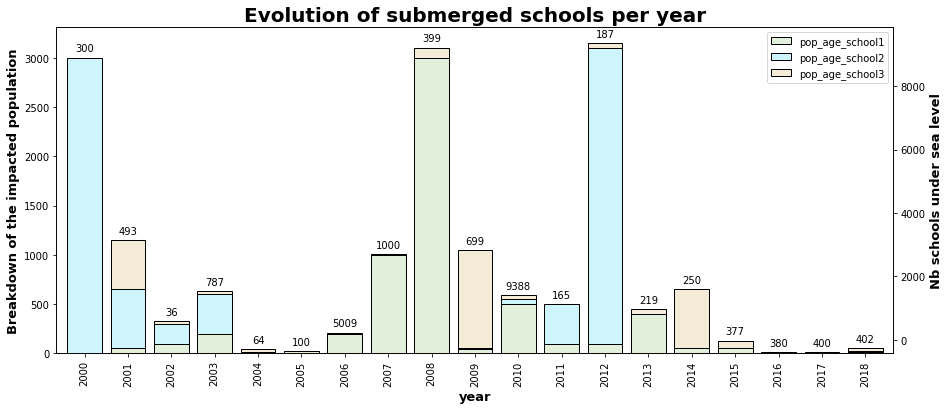

In [6]:
# Initialization
fig, ax = plt.subplots(figsize=(15,6))


# Graph Custom

ax.set_title('Evolution of submerged schools per year', 
             fontsize=20 , 
             fontweight='bold')


ax.set_xlabel('year', 
              fontweight='bold', 
              size = 13)

ax.set_ylabel('Breakdown of the impacted population', 
              fontweight='bold' , 
              size = 13)


# Population List from the input file : We take all the variables after the number of school
colz = dataframe_sea_impact.loc[:,~dataframe_sea_impact.columns.isin(['year', 'nb_school'])].columns

dataframe_sea_impact.plot(
    x='year', 
    y=colz,
    color = ["#E2EFDA","#CEF5FC",'#F4ECD6'],
    kind='bar',
    stacked=True,
    ax=ax,
    width = 0.8,
    edgecolor = 'black'
)


i = 0
vstep = dataframe_sea_impact[colz].sum(axis=1).max() * 0.02
for row in dataframe_sea_impact.index:
    year = dataframe_sea_impact.loc[row, "year"]
    height = dataframe_sea_impact.loc[row, colz].sum()
    value = dataframe_sea_impact.loc[row, "nb_school"]
    #print(year, height, value)
    ax.text(x=i, y=height + vstep, s=f"{value:d}", horizontalalignment="center")
    i += 1
    
    
# 2nd Axis construction part


# Twin the X axis
ax2 = ax.twinx()

# Custom Y2 axis
ax2.set_ylabel('Nb schools under sea level', 
              fontweight='bold' , 
              size = 13)

# Curve bulding
ax2.plot(dataframe_sea_impact['year'], dataframe_sea_impact['nb_school'])   


plt.show(fig)